# Breast cancer Classification using ANN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [3]:
# Loading data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Loading the data into a dataframe
df = pd.DataFrame(
    breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names
)

# Print the top 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = breast_cancer_dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=2
)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Build ANN Model

In [7]:
# We can build NN using tensorflow or Keras
# Keras API is built on top of tensorflow

# importing tensorflow and Keras
import tensorflow as tf

tf.random.set_seed(3)
from tensorflow import keras

In [8]:
# Setting up layers of Neural Network
# Sequential : input layer -> hidden layer ...
# Input layer : number of neurons = number of features
# For Hidden layers we use relu and its variants as activation function
# For output layer -> classification - sigmoid or tan, regression - relu
# Multi classification - number of output layers = number of classes

model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(30,)),
        keras.layers.Dense(20, activation="relu"),
        keras.layers.Dense(2, activation="sigmoid"),
    ]
)

In [9]:
# Compiling the Neural Network
# multiclassification - sparse_categorical_crossentropy
# binaryclassification - binary_categorical_crossentropy

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [10]:
# Training the Neural Network
# Validation data will tell the model when to stop
# 1 epoch = 1 forward propagation & 1 backward propagation

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 1.0305 - accuracy: 0.3863 - val_loss: 0.7791 - val_accuracy: 0.4348
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.7701 - accuracy: 0.6015 - val_loss: 0.5919 - val_accuracy: 0.6957
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7262 - val_loss: 0.4673 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.8093 - val_loss: 0.3762 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8631 - val_loss: 0.3072 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8875 - val_loss: 0.2547 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9193 - val_loss: 0.2184 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

# Visualization

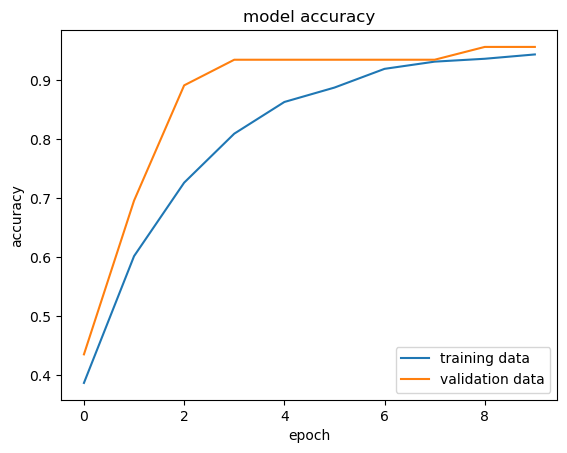

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"], loc="lower right")

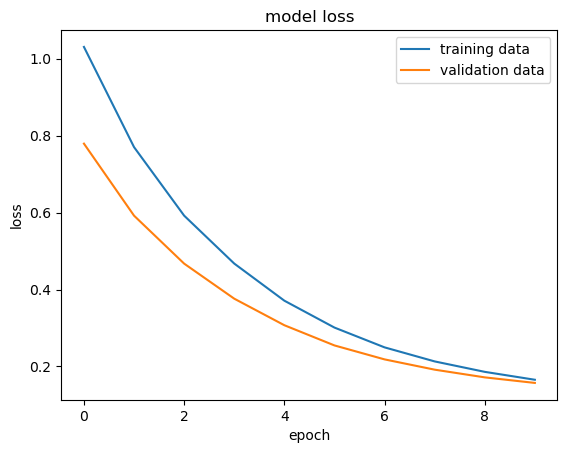

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"], loc="upper right")

# Prediction

In [15]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 0s/step - loss: 0.1431 - accuracy: 0.9561
0.9561403393745422


In [16]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 0s/step


array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.8576953e-27],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2276547e-36],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0983200e-35],
       [1.0000000e+00, 1.9242743e-37],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 9.3464586e-36],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.6613985e-35],
       [1.0000000e+00, 2.3362749e-35],
       [1.0000000e+00, 2.7104041e-36],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.8704262e-27],
       [1.0000000e+00, 1.6479688e-35],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.